Compute scrublet score for global object

# Packages

In [1]:
import scrublet as scr
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
date="20210302"

In [3]:
path_to_fast="/fast/AG_Huebner/"

Doublet rates reported by 10X

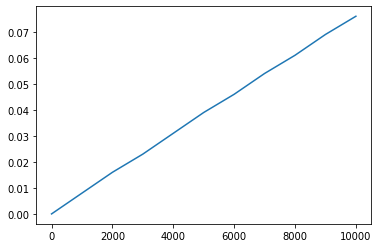

In [4]:
from matplotlib import pyplot 
x = [0, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
y = [0, 0.004, 0.008, 0.016, 0.023, 0.031, 0.039, 0.046, 0.054, 
     0.061, 0.069, 0.076]
pyplot.plot(x,y)

In [5]:
# extracted rates from LM
doublet_table={'0':0,
              '500':0.004,
              '1000':0.008,
              '2000':0.016,
              '3000':0.023,
              '4000':0.031,
              '5000':0.039,
              '6000':0.046,
              '7000':0.054,
              '8000':0.061,
              '9000':0.069,
              '10000':0.076,
              '11000':0.084,
              '12000':0.091,
              '13000':0.099,
              '14000':0.106,
              '15000':0.114,
              '16000':0.122}

In [6]:
global_all=sc.read_h5ad(path_to_fast + "huebner3/ANALYSES/20190926_gp_BadOyenhausen/scanpy/" + date + "/Global_touse/Global_BOBSCBIC_all" + date + ".h5ad")

In [7]:
col_splitby='Sample'

In [8]:
for number_todo in list(range(len(global_all.obs[col_splitby].values.categories))):
    
    # Subset Global object
    sample_id=global_all.obs[col_splitby].values.categories[number_todo]
    adata=global_all[global_all.obs[col_splitby].isin([sample_id])].copy()
    
    # Check expected doublet rate
    expected_doublets=round(adata.shape[0], -3)
    expected_doublets=doublet_table[str(expected_doublets)]
    
    # 
    
    scrub_default = scr.Scrublet(adata.X)
    scrub_z = scr.Scrublet(adata.X, expected_doublet_rate=expected_doublets)
    scrub_log = scr.Scrublet(adata.X, expected_doublet_rate=expected_doublets)
    
    default_doublet_scores, default_predicted_doublets = scrub_z.scrub_doublets()
    z_doublet_scores, z_predicted_doublets = scrub_z.scrub_doublets(n_prin_comps=30, 
                                                                mean_center=True, 
                                                                normalize_variance=True)
    log_doublet_scores, log_predicted_doublets = scrub_log.scrub_doublets(n_prin_comps=30, 
                                                                      mean_center=False, 
                                                                      normalize_variance=False,
                                                                      log_transform=True
                                                                     )
    
    adata.obs['scrublet_score_default']=default_doublet_scores
    adata.obs['predicted_doublets_default']=default_predicted_doublets
    
    adata.obs['scrublet_score_z']=z_doublet_scores
    adata.obs['predicted_doublets_z']=z_predicted_doublets
    
    adata.obs['scrublet_score_log']=log_doublet_scores
    adata.obs['predicted_doublets_log']=log_predicted_doublets
    
    
    if number_todo==0:
        final_merge=adata.obs
  
    else:
        # Merge adata objects
        ##final_merge = final_merge.concatenate(adata.obs)
        final_merge = final_merge.append(pd.DataFrame(data = adata.obs))
    print("Sample " + str(number_todo+1) + " of 305 done")

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.54
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 3.3%
Overall doublet rate:
	Expected   = 4.6%
	Estimated  = 6.4%
Elapsed time: 6.8 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.54
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.6%
Overall doublet rate:
	Expected   = 4.6%
	Estimated  = 7.6%
Elapsed time: 2.7 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using Truncated SVD...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.16
Detected doublet rate = 5.5%
Estimated detectable doublet fraction = 66.7%
Overall doublet rate:
	Expected   = 4.6%
	Estimated  = 8.3%
Elapsed time: 4.5 seconds
Sample 1 of 305 done
Preproce

In [9]:
final_merge

,Sample,batch,Barcode,scrublet_score_default,predicted_doublets_default,scrublet_score_z,predicted_doublets_z,scrublet_score_log,predicted_doublets_log
AAACCCAAGCTCGCAC-BO_H01_LV0_premrna,BO_H01_LV0_premrna,1,AAACCCAAGCTCGCAC-BO_H01_LV0_premrna,0.025181,False,0.033026,False,0.070434,False
AAACCCACACCAAAGG-BO_H01_LV0_premrna,BO_H01_LV0_premrna,1,AAACCCACACCAAAGG-BO_H01_LV0_premrna,0.057171,False,0.047153,False,0.000423,False
AAACCCACACCCTATC-BO_H01_LV0_premrna,BO_H01_LV0_premrna,1,AAACCCACACCCTATC-BO_H01_LV0_premrna,0.009101,False,0.009101,False,0.000860,False
AAACCCACACCGTGCA-BO_H01_LV0_premrna,BO_H01_LV0_premrna,1,AAACCCACACCGTGCA-BO_H01_LV0_premrna,0.035389,False,0.022762,False,0.001085,False
AAACCCACATCCTCAC-BO_H01_LV0_premrna,BO_H01_LV0_premrna,1,AAACCCACATCCTCAC-BO_H01_LV0_premrna,0.187079,False,0.172832,False,0.578808,True
...,...,...,...,...,...,...,...,...,...
TTTGGTTGTGGAGAAA-IC_H04_RV0_premrna,IC_H04_RV0_premrna,3,TTTGGTTGTGGAGAAA-IC_H04_RV0_premrna,0.026536,False,0.020106,False,0.007643,False
TTTGTTGCAGATTAAG-IC_H04_RV0_premrna,IC_H04_RV0_premrna,3,TTTGTTGCAGATTAAG-IC_H04_RV0_premrna,0.013955,False,0.008065,False,0.003887,False
TTTGTTGCAGCGACAA-IC_H04_RV0_premrna,IC_H04_RV0_premrna,3,TTTGTTGCAGCGACAA-IC_H04_RV0_premrna,0.161364,False,0.124555,False,0.161364,False
TTTGTTGTCACCTCAC-IC_H04_RV0_premrna,IC_H04_RV0_premrna,3,TTTGTTGTCACCTCAC-IC_H04_RV0_premrna,0.049459,False,0.030987,False,0.000226,False


In [10]:
#final_merge.to_csv(path_to_fast + "huebner3/ANALYSES/20190926_gp_BadOyenhausen/scanpy/" + date + "/Global_touse/Global_BOBSCBIC_all_scrubletscores" + date + ".csv")